In [2]:
import numpy as np
from sympy import symbols
import matplotlib.pyplot as plt

In [3]:
class Vedral:
  def __init__(self):
    self.n = symbols('n')
    self.N = symbols('N')
    self.ham_wt_N = symbols('|N|')

  def carry_block(self):
    cost_dict = {}
    cost_dict['tof'] = 2
    cost_dict['cnot'] = 1
    cost_dict['x'] = 0
    return cost_dict
    
  def sum_block(self):
    cost_dict = {}
    cost_dict['tof'] = 0
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
  
  def adder_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_b = num_bits
    size_c = num_bits + 1
    
    # block costs
    carry_block_cost = self.carry_block()
    sum_block_cost = self.sum_block()
    # compute adder costs
    cost_dict['tof'] = carry_block_cost['tof']*(num_bits + 1) + carry_block_cost['tof']*num_bits + sum_block_cost['tof']*(num_bits + 1)
    cost_dict['cnot'] = carry_block_cost['cnot']*(num_bits + 1) + 1 + carry_block_cost['cnot']*num_bits + sum_block_cost['cnot']*(num_bits + 1)
    cost_dict['x'] = carry_block_cost['x']*(num_bits + 1) + carry_block_cost['x']*num_bits + sum_block_cost['x']*(num_bits + 1)
    cost_dict['qubits'] = size_a + size_b + size_c
    return cost_dict
  
  def modular_adder_block(self, num_bits):
    cost_dict = {}
    adder_block_cost = self.adder_block(num_bits)
    num_adders = 5
    num_extra_nots = self.ham_wt_N + 2
    num_extra_cnots = 1 + 2*self.ham_wt_N + 1
    num_extra_tof = 0
    cost_dict['tof'] = num_adders*adder_block_cost['tof'] + num_extra_tof
    cost_dict['cnot'] = num_adders*adder_block_cost['cnot'] + num_extra_cnots
    cost_dict['x'] = num_adders*adder_block_cost['x'] + num_extra_nots
    cost_dict['qubits'] = adder_block_cost['qubits'] + num_bits + 1
    return cost_dict
  
  def mbu_modular_adder_block(self, num_bits):
    cost_dict = self.modular_adder_block(num_bits)
    adder_block_cost = self.adder_block(num_bits)
    cost_dict['H'] = 1
    num_hadamards_uncomputation = 2
    num_adders_uncomputation = 2
    num_cnots_uncomputation = 0
    num_x_uncomputation = 1
    cost_dict['H']+= (num_hadamards_uncomputation/2.)
    cost_dict['tof'] -= (num_adders_uncomputation*adder_block_cost['tof']/2.)
    cost_dict['cnot'] -= (num_adders_uncomputation*adder_block_cost['cnot']/2.)
    cost_dict['x'] -= (num_adders_uncomputation*adder_block_cost['x']/2.)
    cost_dict['cnot'] += (num_cnots_uncomputation/2.)
    cost_dict['x'] += (num_x_uncomputation/2.)
    return cost_dict

In [4]:
ved = Vedral()
print(ved.modular_adder_block(ved.n))
print(ved.mbu_modular_adder_block(ved.n))

{'tof': 20*n + 10, 'cnot': 20*n + 2*|N| + 22, 'x': |N| + 2, 'qubits': 4*n + 2}
{'tof': 16.0*n + 8.0, 'cnot': 16.0*n + 2*|N| + 18.0, 'x': |N| + 2.5, 'qubits': 4*n + 2, 'H': 2.0}


In [5]:
class VedralModified:
  def __init__(self):
    self.n = symbols('n')
    self.N = symbols('N')
    self.ham_wt_N = symbols('|N|')

  def carry_block(self):
    cost_dict = {}
    cost_dict['tof'] = 2
    cost_dict['cnot'] = 1
    cost_dict['x'] = 0
    return cost_dict
    
  def sum_block(self):
    cost_dict = {}
    cost_dict['tof'] = 0
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
  
  def adder_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_b = num_bits
    size_c = num_bits + 1
    # block costs
    carry_block_cost = self.carry_block()
    sum_block_cost = self.sum_block()
    # compute adder costs
    cost_dict['tof'] = carry_block_cost['tof']*(num_bits + 1) + carry_block_cost['tof']*num_bits + sum_block_cost['tof']*(num_bits + 1)
    cost_dict['cnot'] = carry_block_cost['cnot']*(num_bits + 1) + 1 + carry_block_cost['cnot']*num_bits + sum_block_cost['cnot']*(num_bits + 1)
    cost_dict['x'] = carry_block_cost['x']*(num_bits + 1) + carry_block_cost['x']*num_bits + sum_block_cost['x']*(num_bits + 1)
    cost_dict['qubits'] = size_a + size_b + size_c
    return cost_dict
  
  def constant_comparator_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_p = num_bits
    size_c = num_bits + 1
    # block costs
    carry_block_cost = self.carry_block()
    sum_block_cost = self.sum_block()
    # compute adder costs
    cost_dict['tof'] = 2*(carry_block_cost['tof']*num_bits + sum_block_cost['tof']*(num_bits + 1))
    cost_dict['cnot'] = 1 + 2*(carry_block_cost['cnot']*num_bits + sum_block_cost['cnot']*(num_bits + 1))
    cost_dict['x'] = 2*(self.ham_wt_N + carry_block_cost['x']*num_bits + sum_block_cost['x']*(num_bits + 1))
    cost_dict['qubits'] = size_a + size_p + size_c
    return cost_dict
  
  def const_ctrl_subtractor_block(self, num_bits):
    cost_dict = self.adder_block(num_bits)
    cost_dict['cnot'] += 2*self.ham_wt_N
    return cost_dict
  
  def comparator_block(self, num_bits):
    cost_dict = self.constant_comparator_block(num_bits)
    cost_dict['x']-= 2*self.ham_wt_N
    return cost_dict
  
  def modular_adder_block(self, num_bits):
    cost_dict = {'tof': 0, 'cnot': 0, 'x':0, 'qubits':0}
    blocks = [self.adder_block(num_bits), self.constant_comparator_block(num_bits), 
              self.const_ctrl_subtractor_block(num_bits), self.comparator_block(num_bits)]
    for block in blocks:
      cost_dict['tof']+=block['tof']
      cost_dict['cnot']+=block['cnot']
      cost_dict['x']+=block['x']
    cost_dict['x']+=1
    return cost_dict
  
  def mbu_modular_adder_block(self, num_bits):
    cost_dict = self.modular_adder_block(num_bits)
    comparator_block_cost = self.comparator_block(num_bits)
    cost_dict['H'] = 1
    num_hadamards_uncomputation = 2
    num_cnots_uncomputation = 0
    num_x_uncomputation = 1
    cost_dict['H']+= (num_hadamards_uncomputation/2.)
    cost_dict['tof'] -= (comparator_block_cost['tof']/2.)
    cost_dict['cnot'] -= (comparator_block_cost['cnot']/2.)
    cost_dict['cnot'] += (num_cnots_uncomputation/2.)
    cost_dict['x'] -= (comparator_block_cost['x']/2.)
    cost_dict['x'] += (num_x_uncomputation/2.)
    return cost_dict

In [6]:
ved = VedralModified()
print(ved.modular_adder_block(ved.n))
print(ved.mbu_modular_adder_block(ved.n))

{'tof': 16*n + 4, 'cnot': 20*n + 2*|N| + 18, 'x': 2*|N| + 1, 'qubits': 0}
{'tof': 14.0*n + 4, 'cnot': 17.0*n + 2*|N| + 15.5, 'x': 2*|N| + 1.5, 'qubits': 0, 'H': 2.0}


In [7]:
class Cuccaro:
  def __init__(self):
    self.n = symbols('n')
    self.N = symbols('N')
    self.ham_wt_N = symbols('|N|')
  
  def maj_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
  
  def uma_2_cnot_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
    
  def uma_3_cnot_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 3
    cost_dict['x'] = 2
    return cost_dict
    
  def adder_block(self, num_bits):
    cost_dict = {}
    maj_block_cost = self.maj_block()
    uma_block_cost = self.uma_2_cnot_block()
    size_a = num_bits
    size_b = num_bits
    
    num_maj = num_bits
    num_uma = num_bits
    num_extra_cnot = 1
    cost_dict['tof'] = num_maj*maj_block_cost['tof'] + num_uma*uma_block_cost['tof']
    cost_dict['qubits'] = size_a + size_b + 2
    cost_dict['cnot'] = num_maj*maj_block_cost['cnot'] + num_uma*uma_block_cost['cnot'] + num_extra_cnot
    cost_dict['x'] = num_maj*maj_block_cost['x'] + num_uma*uma_block_cost['x']
    return cost_dict

  def constant_comparator_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_p = num_bits
    size_c = 2
    # block costs
    uma_block_cost = self.uma_2_cnot_block()
    # compute adder costs
    cost_dict['tof'] = 2*uma_block_cost['tof']*num_bits
    cost_dict['cnot'] = 1 + 2*uma_block_cost['cnot']*num_bits
    cost_dict['x'] = 2*(self.ham_wt_N + uma_block_cost['x']*num_bits)
    cost_dict['qubits'] = size_a + size_p + size_c
    return cost_dict
  
  def const_ctrl_subtractor_block(self, num_bits):
    cost_dict = self.adder_block(num_bits)
    cost_dict['cnot'] += 2*self.ham_wt_N
    return cost_dict
  
  def comparator_block(self, num_bits):
    cost_dict = self.constant_comparator_block(num_bits)
    cost_dict['x']-=2*self.ham_wt_N
    return cost_dict
  
  def modular_adder_block(self, num_bits):
    cost_dict = {'tof': 0, 'cnot': 0, 'x':0, 'qubits':0}
    blocks = [self.adder_block(num_bits), self.constant_comparator_block(num_bits), 
              self.const_ctrl_subtractor_block(num_bits), self.comparator_block(num_bits)]
    for block in blocks:
      cost_dict['tof']+=block['tof']
      cost_dict['cnot']+=block['cnot']
      cost_dict['x']+=block['x']
    cost_dict['x']+=1
    return cost_dict
  
  def mbu_modular_adder_block(self, num_bits):
    cost_dict = self.modular_adder_block(num_bits)
    comparator_block_cost = self.comparator_block(num_bits)
    cost_dict['H'] = 1
    num_hadamards_uncomputation = 2
    num_cnots_uncomputation = 0
    num_x_uncomputation = 1
    cost_dict['H']+= (num_hadamards_uncomputation/2.)
    cost_dict['tof'] -= (comparator_block_cost['tof']/2.)
    cost_dict['cnot'] -= (comparator_block_cost['cnot']/2.)
    cost_dict['cnot'] += (num_cnots_uncomputation/2.)
    cost_dict['x'] -= (comparator_block_cost['x']/2.)
    cost_dict['x'] += (num_x_uncomputation/2.)
    return cost_dict

In [8]:
cuc = Cuccaro()
# print(cuc.adder_block(cuc.n))
# print(cuc.constant_comparator_block(cuc.n))
# print(cuc.const_ctrl_subtractor_block(cuc.n))
# print(cuc.comparator_block(cuc.n))
print(cuc.modular_adder_block(cuc.n))
print(cuc.mbu_modular_adder_block(cuc.n))

{'tof': 8*n, 'cnot': 16*n + 2*|N| + 4, 'x': 2*|N| + 1, 'qubits': 0}
{'tof': 7.0*n, 'cnot': 14.0*n + 2*|N| + 3.5, 'x': 2*|N| + 1.5, 'qubits': 0, 'H': 2.0}


### Gidney Adder

In [9]:
class Gidney:
  def __init__(self):
    self.n = symbols('n')
    self.N = symbols('N')
    self.ham_wt_N = symbols('|N|')
  
  def maj_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 3
    cost_dict['x'] = 0
    cost_dict['cz']=0
    cost_dict['H']=0
    return cost_dict
  
  def uma_block(self):
    cost_dict = {}
    cost_dict['tof'] = 0
    cost_dict['cz'] = 0.5
    cost_dict['H'] = 1
    cost_dict['cnot'] = 3
    cost_dict['x'] = 0
    return cost_dict
    
  def adder_block(self, num_bits):
    cost_dict = {}
    maj_block_cost = self.maj_block()
    uma_block_cost = self.uma_block()
    size_a = num_bits
    size_b = num_bits
    
    num_maj = num_bits
    num_uma = num_bits
    num_extra_cnot = 1
    cost_dict['tof'] = num_maj*maj_block_cost['tof'] + num_uma*uma_block_cost['tof']
    cost_dict['qubits'] = size_a + size_b + 2
    cost_dict['cnot'] = num_maj*maj_block_cost['cnot'] + num_uma*uma_block_cost['cnot'] + num_extra_cnot
    cost_dict['x'] = num_maj*maj_block_cost['x'] + num_uma*uma_block_cost['x']
    cost_dict['cz']=num_maj*maj_block_cost['cz'] + num_uma*uma_block_cost['cz']
    cost_dict['H']=num_maj*maj_block_cost['H'] + num_uma*uma_block_cost['H']
    return cost_dict

  def constant_comparator_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_p = num_bits
    size_c = 2
    # block costs
    uma_block_cost = self.maj_block()
    # compute adder costs
    cost_dict['tof'] = uma_block_cost['tof']*num_bits
    cost_dict['cnot'] = 1 + 2*uma_block_cost['cnot']*num_bits
    cost_dict['x'] = 2*(self.ham_wt_N + uma_block_cost['x']*num_bits)
    cost_dict['qubits'] = size_a + size_p + size_c
    
    uma_block_cost = self.uma_block()
    cost_dict['cz']= uma_block_cost['cz']*num_bits
    cost_dict['H']= uma_block_cost['H']*num_bits
    return cost_dict
  
  def const_ctrl_subtractor_block(self, num_bits):
    cost_dict = self.adder_block(num_bits)
    cost_dict['cnot'] += 2*self.ham_wt_N
    return cost_dict
  
  def comparator_block(self, num_bits):
    cost_dict = self.constant_comparator_block(num_bits)
    cost_dict['x']-=2*self.ham_wt_N
    return cost_dict
  
  def modular_adder_block(self, num_bits):
    cost_dict = {'tof': 0, 'cnot': 0, 'x':0, 'qubits':0, 'H': 0, 'cz':0}
    blocks = [self.adder_block(num_bits), self.constant_comparator_block(num_bits), 
              self.const_ctrl_subtractor_block(num_bits), self.comparator_block(num_bits)]
    for block in blocks:
      cost_dict['tof']+=block['tof']
      cost_dict['cnot']+=block['cnot']
      cost_dict['x']+=block['x']
      cost_dict['H']+=block['H']
      cost_dict['cz']+=block['cz']
    cost_dict['x']+=1
    return cost_dict
  
  def mbu_modular_adder_block(self, num_bits):
    cost_dict = self.modular_adder_block(num_bits)
    comparator_block_cost = self.comparator_block(num_bits)
    cost_dict['H'] += 1
    num_hadamards_uncomputation = 2
    num_cnots_uncomputation = 0
    num_x_uncomputation = 1
    cost_dict['H']+= (num_hadamards_uncomputation/2.)
    cost_dict['tof'] -= (comparator_block_cost['tof']/2.)
    cost_dict['cnot'] -= (comparator_block_cost['cnot']/2.)
    cost_dict['cnot'] += (num_cnots_uncomputation/2.)
    cost_dict['x'] -= (comparator_block_cost['x']/2.)
    cost_dict['x'] += (num_x_uncomputation/2.)
    cost_dict['cz'] -= (comparator_block_cost['cz']/2.)
    cost_dict['H'] -= (comparator_block_cost['H']/2.)
    return cost_dict

In [10]:
gid = Gidney()
print(gid.modular_adder_block(gid.n), gid.modular_adder_block(gid.n)['cnot']+gid.modular_adder_block(gid.n)['cz'])
print(gid.mbu_modular_adder_block(gid.n), gid.mbu_modular_adder_block(gid.n)['cnot']+gid.mbu_modular_adder_block(gid.n)['cz'])

{'tof': 4*n, 'cnot': 24*n + 2*|N| + 4, 'x': 2*|N| + 1, 'qubits': 0, 'H': 4*n, 'cz': 2.0*n} 26.0*n + 2*|N| + 4
{'tof': 3.5*n, 'cnot': 21.0*n + 2*|N| + 3.5, 'x': 2*|N| + 1.5, 'qubits': 0, 'H': 3.5*n + 2.0, 'cz': 1.75*n} 22.75*n + 2*|N| + 3.5


In [11]:
class GidneyCuccaro:
  def __init__(self):
    self.n = symbols('n')
    self.N = symbols('N')
    self.ham_wt_N = symbols('|N|')

  def cuc_maj_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
  
  def cuc_uma_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 2
    cost_dict['x'] = 0
    return cost_dict
  
  def gid_maj_block(self):
    cost_dict = {}
    cost_dict['tof'] = 1
    cost_dict['cnot'] = 3
    cost_dict['x'] = 0
    cost_dict['cz']=0
    cost_dict['H']=0
    return cost_dict
  
  def gid_uma_block(self):
    cost_dict = {}
    cost_dict['tof'] = 0
    cost_dict['cz'] = 0.5
    cost_dict['H'] = 1
    cost_dict['cnot'] = 3
    cost_dict['x'] = 0
    return cost_dict
    
  def adder_block(self, num_bits):
    cost_dict = {}
    maj_block_cost = self.gid_maj_block()
    uma_block_cost = self.gid_uma_block()
    size_a = num_bits
    size_b = num_bits
    
    num_maj = num_bits
    num_uma = num_bits
    num_extra_cnot = 1
    cost_dict['tof'] = num_maj*maj_block_cost['tof'] + num_uma*uma_block_cost['tof']
    cost_dict['qubits'] = size_a + size_b + 2
    cost_dict['cnot'] = num_maj*maj_block_cost['cnot'] + num_uma*uma_block_cost['cnot'] + num_extra_cnot
    cost_dict['x'] = num_maj*maj_block_cost['x'] + num_uma*uma_block_cost['x']
    cost_dict['cz']=num_maj*maj_block_cost['cz'] + num_uma*uma_block_cost['cz']
    cost_dict['H']=num_maj*maj_block_cost['H'] + num_uma*uma_block_cost['H']
    return cost_dict
  
  def constant_comparator_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_p = num_bits
    size_c = 2
    # block costs
    uma_block_cost = self.cuc_uma_block()
    # compute adder costs
    cost_dict['tof'] = 2*uma_block_cost['tof']*num_bits
    cost_dict['cnot'] = 1 + 2*uma_block_cost['cnot']*num_bits
    cost_dict['x'] = 2*(self.ham_wt_N + uma_block_cost['x']*num_bits)
    cost_dict['qubits'] = size_a + size_p + size_c
    cost_dict['cz']=0
    cost_dict['H']=0
    return cost_dict
  
  def const_ctrl_subtractor_block(self, num_bits):
    cost_dict = {}
    maj_block_cost = self.cuc_maj_block()
    uma_block_cost = self.cuc_uma_block()
    size_a = num_bits
    size_b = num_bits
    
    num_maj = num_bits
    num_uma = num_bits
    num_extra_cnot = 1
    cost_dict['tof'] = num_maj*maj_block_cost['tof'] + num_uma*uma_block_cost['tof']
    cost_dict['qubits'] = size_a + size_b + 2
    cost_dict['cnot'] = num_maj*maj_block_cost['cnot'] + num_uma*uma_block_cost['cnot'] + num_extra_cnot
    cost_dict['x'] = num_maj*maj_block_cost['x'] + num_uma*uma_block_cost['x']
    cost_dict['cz']=0
    cost_dict['H']=0
    cost_dict['cnot'] += 2*self.ham_wt_N
    return cost_dict
  
  def comparator_block(self, num_bits):
    cost_dict = {}
    size_a = num_bits
    size_p = num_bits
    size_c = 2
    # block costs
    uma_block_cost = self.gid_maj_block()
    # compute adder costs
    cost_dict['tof'] = uma_block_cost['tof']*num_bits
    cost_dict['cnot'] = 1 + 2*uma_block_cost['cnot']*num_bits
    cost_dict['x'] = 2*(self.ham_wt_N + uma_block_cost['x']*num_bits)
    cost_dict['qubits'] = size_a + size_p + size_c
    
    uma_block_cost = self.gid_uma_block()
    cost_dict['cz']= uma_block_cost['cz']*num_bits
    cost_dict['H']= uma_block_cost['H']*num_bits
    cost_dict['x']-=2*self.ham_wt_N
    return cost_dict
  
  def modular_adder_block(self, num_bits):
    cost_dict = {'tof': 0, 'cnot': 0, 'x':0, 'qubits':0, 'H': 0, 'cz':0}
    blocks = [self.adder_block(num_bits), self.constant_comparator_block(num_bits), 
              self.const_ctrl_subtractor_block(num_bits), self.comparator_block(num_bits)]
    for block in blocks:
      cost_dict['tof']+=block['tof']
      cost_dict['cnot']+=block['cnot']
      cost_dict['x']+=block['x']
      cost_dict['H']+=block['H']
      cost_dict['cz']+=block['cz']
    cost_dict['x']+=1
    return cost_dict
  
  def mbu_modular_adder_block(self, num_bits):
    cost_dict = self.modular_adder_block(num_bits)
    comparator_block_cost = self.comparator_block(num_bits)
    cost_dict['H'] += 1
    num_hadamards_uncomputation = 2
    num_cnots_uncomputation = 0
    num_x_uncomputation = 1
    cost_dict['H']+= (num_hadamards_uncomputation/2.)
    cost_dict['tof'] -= (comparator_block_cost['tof']/2.)
    cost_dict['cnot'] -= (comparator_block_cost['cnot']/2.)
    cost_dict['cnot'] += (num_cnots_uncomputation/2.)
    cost_dict['x'] -= (comparator_block_cost['x']/2.)
    cost_dict['x'] += (num_x_uncomputation/2.)
    cost_dict['cz'] -= (comparator_block_cost['cz']/2.)
    cost_dict['H'] -= (comparator_block_cost['H']/2.)
    return cost_dict  

In [12]:
gidcuc = GidneyCuccaro()
print(gidcuc.modular_adder_block(gidcuc.n), gidcuc.modular_adder_block(gidcuc.n)['cnot']+gidcuc.modular_adder_block(gidcuc.n)['cz'])
print(gidcuc.mbu_modular_adder_block(gidcuc.n), gidcuc.mbu_modular_adder_block(gidcuc.n)['cnot']+gidcuc.mbu_modular_adder_block(gidcuc.n)['cz'])

{'tof': 6*n, 'cnot': 20*n + 2*|N| + 4, 'x': 2*|N| + 1, 'qubits': 0, 'H': 2*n, 'cz': 1.0*n} 21.0*n + 2*|N| + 4
{'tof': 5.5*n, 'cnot': 17.0*n + 2*|N| + 3.5, 'x': 2*|N| + 1.5, 'qubits': 0, 'H': 1.5*n + 2.0, 'cz': 0.75*n} 17.75*n + 2*|N| + 3.5


## Coset vs MBU Modular adder

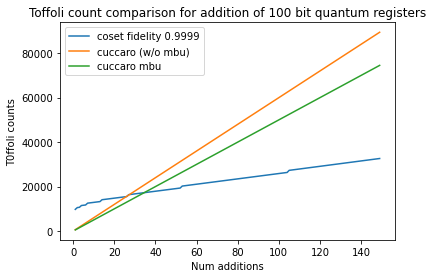

In [20]:
req_infidelity = 1e-4
def coset_rep_cost(num_bits, num_additions):
  m = np.ceil(np.log2(num_additions/req_infidelity))
  num_tof_coset = 2*((m+1)*(2*num_bits+m) + 0.5*((m+1)*(2*num_bits+m))) + (num_bits+m)*num_additions
  return num_tof_coset

def cuccaro_modular_add_cost(num_bits, num_additions):
  return 6*num_bits*num_additions
def cuccaro_mbu_modular_add_cost(num_bits, num_additions):
  return 5*num_bits*num_additions

num_bits = 100
addition_counts = np.arange(1, 150)
coset_rep_costs = [coset_rep_cost(num_bits, num_additions) for num_additions in addition_counts]
cuccaro_modular_add_costs = [cuccaro_modular_add_cost(num_bits, num_additions) for num_additions in addition_counts]
cuccaro_mbu_modular_add_costs = [cuccaro_mbu_modular_add_cost(num_bits, num_additions) for num_additions in addition_counts]


plt.plot(addition_counts, coset_rep_costs, label=f"coset fidelity {1-req_infidelity}")
plt.plot(addition_counts, cuccaro_modular_add_costs, label="cuccaro (w/o mbu)")
plt.plot(addition_counts, cuccaro_mbu_modular_add_costs, label="cuccaro mbu")
plt.xlabel("Num additions")
plt.ylabel("Toffoli counts")
plt.title(f"Toffoli count comparison for addition of {num_bits} bit quantum registers")
plt.legend()
plt.show()